In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data.csv", decimal = ',', sep = ';')
print(data.shape)

(48, 1)


In [129]:
def create_matrix(data, M):
    '''funciton for creating matrix for ssa'''

    result = np.zeros((M, 1))
    n = len(data)

    for i in range(n - M + 1):
        result = np.hstack((result, data[i:M+i]))

    return result[:,1:]

X = create_matrix(data.to_numpy(), 16)


In [187]:
def eig_matlab(M):
    '''по полученной матрице M возвращает собственные занчения и собственные числа в формате как MatLab'''
    lmdas, vectors = np.linalg.eigh(M)
    d1, d2 = M.shape
    L = np.zeros((d1))


    for i,l in enumerate(lmdas):
        temp = np.zeros(len(lmdas))
        temp[i] = l
        L = np.vstack((L, temp))

    L = L[1:]

    return [L, vectors]

A = np.dot(X,np.transpose(X))
[L, V] = eig_matlab(A)
pd.DataFrame(L).to_excel("lambdas.xlsx")

print(V.shape)

X_n = np.dot(np.dot(V,np.transpose(V)), X)
print(X_n.shape)

(16, 16)
(16, 33)


In [188]:
result = []

print(np.zeros((1, 33)).shape)
print(X_n.shape)
X_n = np.vstack((np.zeros((1, 33)), X_n))

print(X_n.shape)
X_n = np.hstack((np.zeros((17, 1)), X_n))
print(X_n.shape)

for t in range(1,48):
    sum = 0
    if t < 16:
        for i in range(1,t):
            sum += X_n[16-t+i,i]

        result.append(sum/t)
    elif t < 33:
        for i in range(1,16):
            sum += X_n[i,t-16+i]
        
        result.append(sum/16)
    else:
        for i in range(1, 48-t+1):
            sum += X_n[i,t -16+i]

        result.append(sum/(48-t+1))

#print(result)
        

(1, 33)
(16, 33)
(17, 33)
(17, 34)


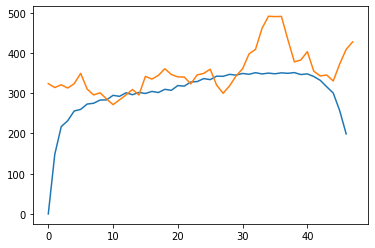

In [189]:
plt.plot(result)
plt.plot(data['y'])